In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [2]:
root = "../../../"

In [3]:
df = pd.read_csv(root + "datasets/binary/processed/CICDDoS_corr.csv", index_col=[0])

In [4]:
df[' Label'] = df[' Label'].apply(lambda x: 'ATTACK' if x != 'BENIGN' else 'BENIGN')

In [5]:
X = df.drop(columns=[' Label'])
y = df[' Label']

In [6]:
mi = mutual_info_classif(X, y)
mi

array([0.40875478, 0.36610937, 0.2363772 , 0.46854818, 0.11320243,
       0.23445081, 0.15994061, 0.43497048, 0.43221028, 0.42490177,
       0.3921451 , 0.21210079, 0.12948018, 0.06683926, 0.32883582,
       0.08102931, 0.32517086, 0.30113875, 0.04530526, 0.20522451,
       0.35785333, 0.41716236, 0.39641317, 0.47678198, 0.48227029,
       0.28962829, 0.04183826, 0.        , 0.18646352, 0.07908017,
       0.28707734, 0.36715034, 0.23677773, 0.29715075, 0.16606059,
       0.09469769, 0.04115039, 0.02569852, 0.0228902 , 0.03965159])

Text(0, 0.5, 'Mutual Information')

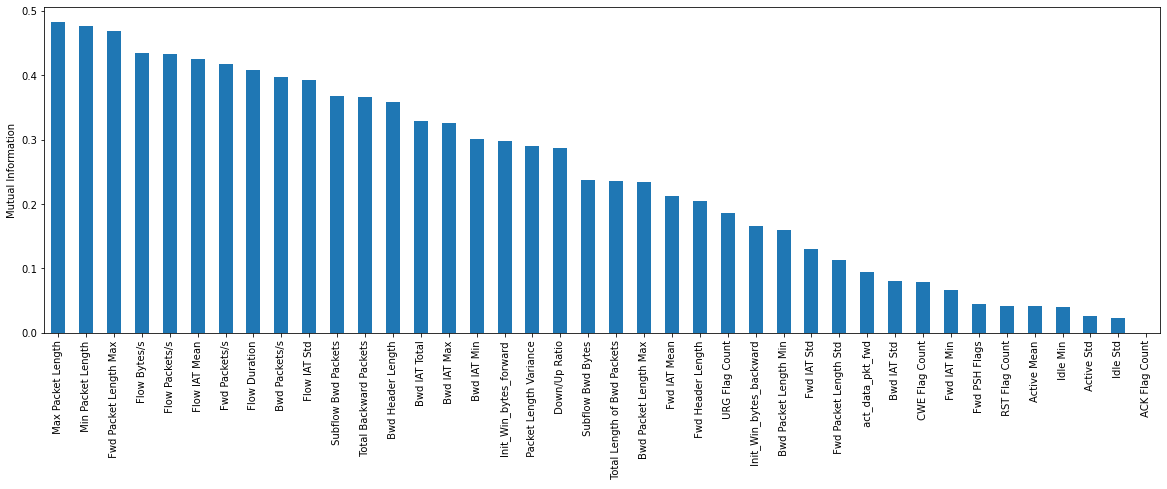

In [7]:
# 1) let's capture the above array in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on their mutual information value
# 4) and make a bar plot

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information')

In [8]:
# here we will select the top 20 features
# based on their mutual information value

# select features
selector = SelectKBest(mutual_info_classif, k=20).fit(X, y)

# display features
X.columns[selector.get_support()]

Index([' Flow Duration', ' Total Backward Packets', ' Fwd Packet Length Max',
       'Bwd Packet Length Max', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', 'Bwd IAT Total', ' Bwd IAT Max',
       ' Bwd IAT Min', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Variance',
       ' Down/Up Ratio', ' Subflow Bwd Packets', 'Init_Win_bytes_forward'],
      dtype='object')

In [9]:
# to remove the rest of the features:

X = selector.transform(X)

In [10]:
X.shape

(5280, 20)